##Importing The Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

##Importing the California Housing Dataset

In [2]:
housing_price_dataset = sklearn.datasets.fetch_california_housing()
print(housing_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [3]:
#loading the dataset into pandas dataframe
dataset = pd.DataFrame(housing_price_dataset.data, columns=housing_price_dataset.feature_names)
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
#adding the target column
dataset["Price"] = housing_price_dataset.target

In [5]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
dataset.shape

(20640, 9)

In [7]:
#Check for missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [8]:
#statistical measures on the data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Understanding Correlation btw the Dataset features

In [9]:
correlation = dataset.corr()

<Axes: >

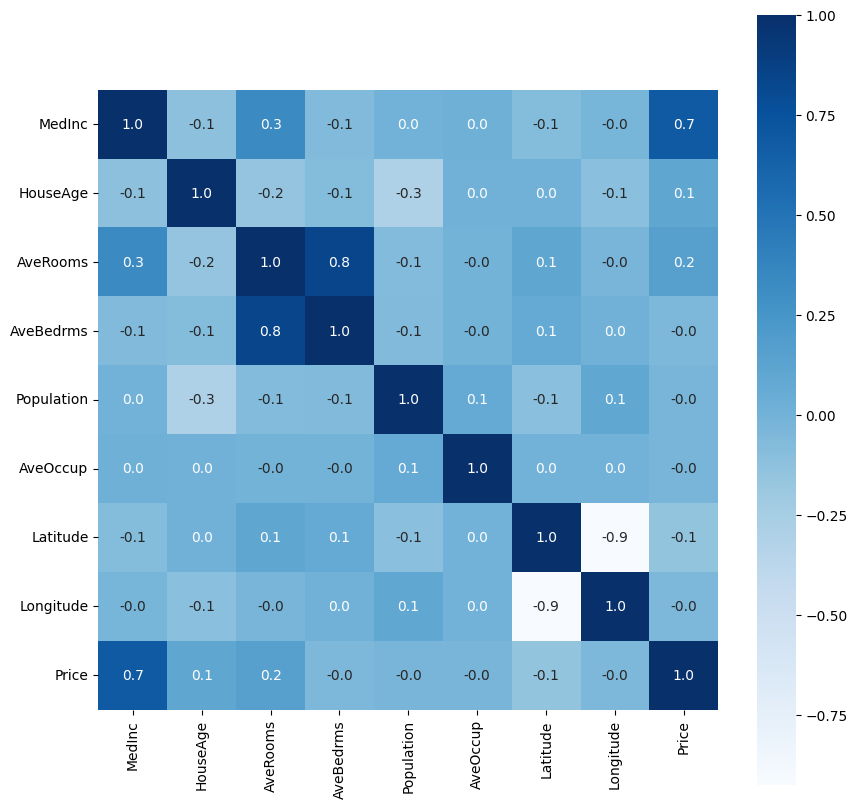

In [10]:
#constructiong Heat Map to understand Correlation
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, cmap="Blues")

##Splitting the data in features X and Target label

In [11]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [12]:
print(X)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [13]:
print(y)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [14]:
#spliting the data into trian and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=2)

In [15]:
X.shape

(20640, 8)

In [16]:
X_train.shape

(16512, 8)

In [17]:
X_test.shape

(4128, 8)

##Model Selcetion And Trianing

XGBOOST

In [18]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evalution

In [19]:
training_data_pred = model.predict(X_train)

In [20]:
#R Squared metric
train_R2_score = metrics.r2_score(training_data_pred, y_train)
#Mean absolute Error
MAE_train = metrics.mean_absolute_error(training_data_pred, y_train)

print(f"R2 score on trianing data is {train_R2_score}")
print(f"Mean Absolute Error score on trianing data is {MAE_train}")

R2 score on trianing data is 0.9388728224535162
Mean Absolute Error score on trianing data is 0.1919170860794262


In [21]:
#R Squared metric
test_R2_score = metrics.r2_score(model.predict(X_test), y_test)
#Mean absolute Error
MAE_test = metrics.mean_absolute_error(model.predict(X_test), y_test)

print(f"R2 score on test data is {test_R2_score}")
print(f"Mean Absolute Error score on test data is {MAE_test}")

R2 score on test data is 0.8180341276965707
Mean Absolute Error score on test data is 0.30753655785801337


In [22]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.3 MB/s eta 0:00:00


In [23]:
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train, y_train)

Learning rate set to 0.063766
0:	learn: 1.1111859	total: 62.8ms	remaining: 1m 2s
1:	learn: 1.0732788	total: 98.6ms	remaining: 49.2s
2:	learn: 1.0393521	total: 113ms	remaining: 37.7s
3:	learn: 1.0074317	total: 144ms	remaining: 35.9s
4:	learn: 0.9776973	total: 160ms	remaining: 31.9s
5:	learn: 0.9508025	total: 172ms	remaining: 28.6s
6:	learn: 0.9256118	total: 196ms	remaining: 27.8s
7:	learn: 0.9026203	total: 209ms	remaining: 25.9s
8:	learn: 0.8828547	total: 223ms	remaining: 24.5s
9:	learn: 0.8615399	total: 235ms	remaining: 23.3s
10:	learn: 0.8426871	total: 249ms	remaining: 22.4s
11:	learn: 0.8246843	total: 262ms	remaining: 21.6s
12:	learn: 0.8088826	total: 274ms	remaining: 20.8s
13:	learn: 0.7923303	total: 283ms	remaining: 19.9s
14:	learn: 0.7772415	total: 295ms	remaining: 19.4s
15:	learn: 0.7647399	total: 307ms	remaining: 18.9s
16:	learn: 0.7508689	total: 322ms	remaining: 18.6s
17:	learn: 0.7384161	total: 335ms	remaining: 18.3s
18:	learn: 0.7285091	total: 351ms	remaining: 18.1s
19:	learn

In [24]:
#R Squared metric
test_R2_score = metrics.r2_score(regressor.predict(X_test), y_test)
#Mean absolute Error
MAE_test = metrics.mean_absolute_error(regressor.predict(X_test), y_test)

print(f"R2 score on test data is {test_R2_score}")
print(f"Mean Absolute Error score on test data is {MAE_test}")

R2 score on test data is 0.8241101674144223
Mean Absolute Error score on test data is 0.29088064422533
